# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

>medv: median value of owner-occupied homes in $1000s

>dis: weighted mean of distances to five Boston employment centres.

_(ii)_ What concept ‘defines’ the plotted line?

>The concept of the plotted line is the hypothesis of a linear relationship between home values and distances to work.

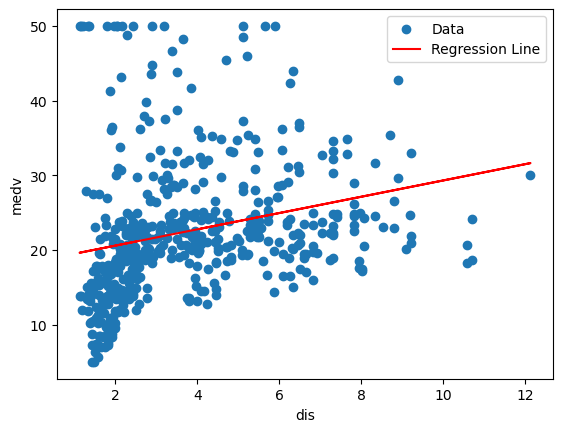

In [3]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

>The null hypothesis would be that there is no relationship, explicitly that distance does not explain value
>
>The alternative hypothesis is a linear relationship exists such median value and average distance change proportionally with eachother.

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).
>code below

In [8]:
y = medv
X = sm.add_constant(dis)

model = sm.OLS(y,X)
results = model.fit()

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  

>$B_0$ = 18.3901 | $B_1$ = 1.0916


_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  

>the _standard error_ for $B_0$ is 0.817
>the _standard error_ for $B_1$ is 0.188


_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

>the _confidence intervals_ for $B_0$ are 16.784 to 19.996
>the _confidence intervals_ for $B_0$ are 0.722 to 1.462

In [17]:
coef = results.params
print(coef)

[18.39008833  1.09161302]


In [19]:
# Get confidence intervals for coefficients
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
[[16.78417945 19.99599722]
 [ 0.72150933  1.4617167 ]]



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)
> The $R^2$ statistic is 0.062, an extremely low result. $R^2$ ranges from 0 to 1 with 0 representing no explanatory power and 1 representing ideal full explanatory power. I interpret this $R^2$ to indicate a deficit of explanatory power behind the hypothesis that distance to work explains house values in Boston.

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value). 
> The f-statistic is 33.58 and the p-value is 0.000, these values suggest we reject a null hypothesis that the House price is NOT explained at all by distance to work. Distance to work is significant statistically. Despite explaining very little about the price.

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        15:29:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
x1             1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            18.3901      0.817     22.499      0.000      16.784      19.996


### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [23]:
XM = MS(['dis', 'rm']).fit_transform(Boston)
multimodel = sm.OLS(y,XM)
multiresults = multimodel.fit()
multiresults.summary()

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        16:02:39   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.000     -39.786     -29.486
dis            0.4888      0.141      3.459      0.001       0.211       0.767
rm             8.8014      0.424     20.780      0.000       7.969       9.634
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.
> The **null hypothesis** is that home value is not explained by number of rooms as well as not explained by the distance to work centers.

> The **alternative hypothesis** investigates whether home values have a correlation with the average distance to work centers, or if home values have a correlation with the number of rooms.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?
> Since $R^2$ = 0.496, $R^2$ falls right in the middle of the range between not explanatory, and explanatory. Hence we can assert that some of the price is predicted by dis and rm, but certainly not all of the price can be explained by them.

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?
> The $rm$ outliers are homes with very high value with every number of rooms, some homes have features lending them high value at all numbers of rooms which reduces the explanatory power of the model.

> The $dis$ outliers cluster toward low $dis$ and have a wide range of $medv$ from very low to very high. The greater the $dis$ the more the homes values converge to the mean. The definition of dis is an average of distances to major work centers, this calculation might be obscuring the geographic relationship with $medv$. To elaborate: US cities commonly have low income high crime inner city nbhds. Hence there is likely a downtown cluster of homes with low $dis$ being situated between every nbhd and every other nbhd but also we expect this pocket to have a low house value – these would be responsible for low $medv$ outliers. On the other hand a similar pocket of centralized real estate must be an elite territory and cause the outliers of high $medv$ 

<function matplotlib.pyplot.show(close=None, block=None)>

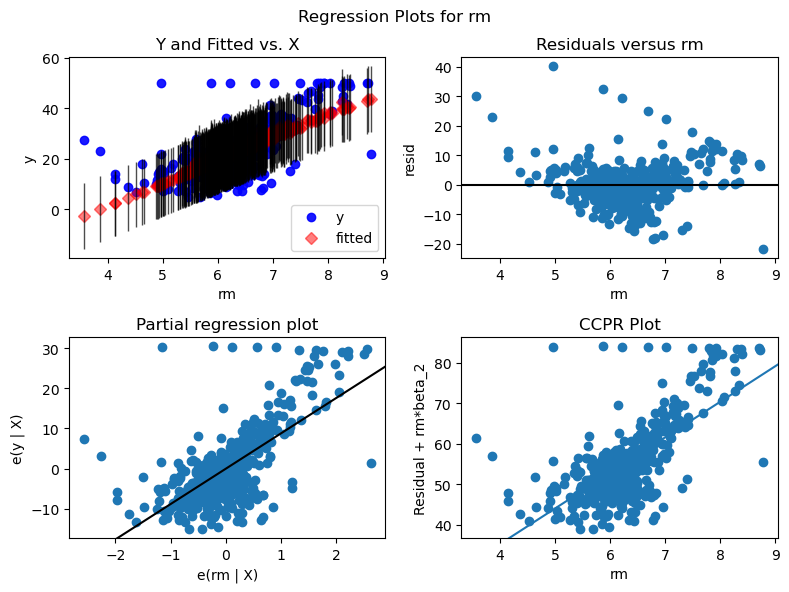

In [28]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(multiresults,'rm',fig=fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

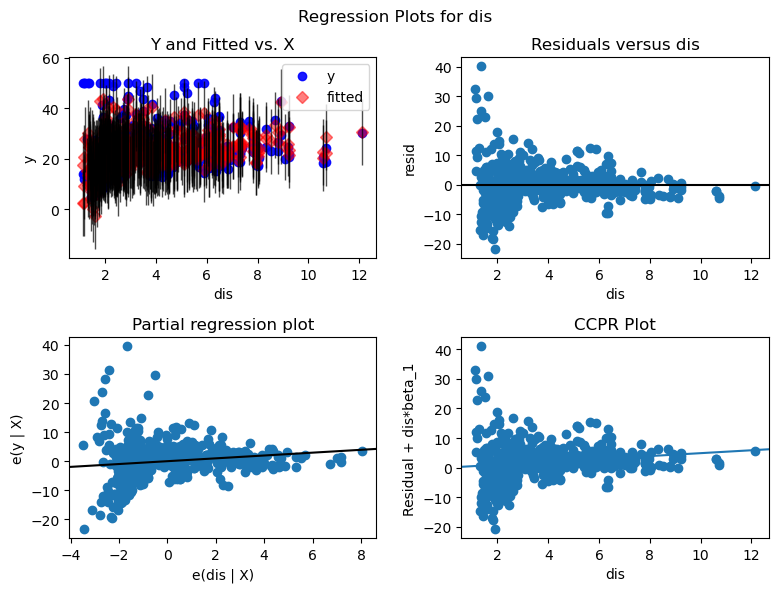

In [29]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(multiresults,'dis',fig=fig)
plt.show

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

>I tried multiplying the values of $ptratio$ and $rm$ together to test for an interaction. The pupil-teacher ratio and the number of rooms test for education quality and family size as indicators of house value. The $p-value$ indicates there is statistical significance and the $R^2$ value of $0.605$ indicates explanatory value is present but generally not sufficient explain **all** of the home value results

In [36]:
model = sm.OLS.from_formula('medv ~ ptratio * rm', data=Boston)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     256.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          5.67e-101
Time:                        16:37:39   Log-Likelihood:                -1604.9
No. Observations:                 506   AIC:                             3218.
Df Residuals:                     502   BIC:                             3235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -132.1375     17.721     -7.456      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
